In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
# from prophet import Prophet
from functions import load_data, replace_missing_long, widen_data, feature_engineering, normalize_data, remove_outliers, group_data, remove_incorrect_values, impute_missing_wide

In [10]:
data = load_data()
data = remove_incorrect_values(data)
data

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...,...
376907,2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


### Task 1B: Data cleaning

In [11]:
data = replace_missing_long(data)

In [12]:
# transform the data to wide format
data = widen_data(data)
data

variable,id,time,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
0,AS14.01,2014-02-17 12:04:42.394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,AS14.01,2014-02-17 18:28:25.520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,AS14.01,2014-02-18 09:29:51.257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,AS14.01,2014-02-19 14:43:30.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,AS14.01,2014-02-19 17:29:10.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358917,AS14.33,2014-05-30 22:32:05.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358918,AS14.33,2014-05-30 22:32:11.049,NaN,3.122,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358919,AS14.33,2014-05-30 22:32:14.240,NaN,1.003,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358920,AS14.33,2014-05-30 22:32:15.246,NaN,4.134,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data

variable,id,time,activity,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,...,appCat.travel,appCat.unknown,appCat.utilities,appCat.weather,call,circumplex.arousal,circumplex.valence,mood,screen,sms
0,AS14.01,2014-02-17 12:04:42.394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,AS14.01,2014-02-17 18:28:25.520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,AS14.01,2014-02-18 09:29:51.257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,AS14.01,2014-02-19 14:43:30.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,AS14.01,2014-02-19 17:29:10.378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358917,AS14.33,2014-05-30 22:32:05.016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358918,AS14.33,2014-05-30 22:32:11.049,NaN,3.122,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358919,AS14.33,2014-05-30 22:32:14.240,NaN,1.003,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
358920,AS14.33,2014-05-30 22:32:15.246,NaN,4.134,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# group the wide data by day and id and aggregate the sum and mean of the variables
grouped_wide = group_data(data)
grouped_wide

/var/folders/_8/8ncqfw110mzcbtcgj00vq8740000gn/T/ipykernel_10204/1244199711.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


variable,time,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,...,appCat.office_freq_count,appCat.other_freq_count,appCat.social_freq_count,appCat.travel_freq_count,appCat.unknown_freq_count,appCat.utilities_freq_count,appCat.weather_freq_count,screen_freq_count,call_freq_count,sms_freq_count
0,2014-02-17,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2014-02-18,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2014-02-19,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,2014-02-20,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,2014-02-21,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,2014-06-05,6.454897,3.538085,0.0,0.0,0.0,0.0,0.174760,0.634554,0.832978,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
109,2014-06-06,3.261717,5.899738,0.0,0.0,0.0,0.0,0.125566,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
110,2014-06-07,36.169050,5.294712,0.0,0.0,0.0,0.0,0.044705,0.768705,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
111,2014-06-08,10.648152,11.379242,0.0,0.0,0.0,0.0,0.547545,5.780606,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [7]:
# show rows where mood is nan
grouped_wide[grouped_wide['mood'].isna()]


variable,time,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,...,appCat.office_freq_count,appCat.other_freq_count,appCat.social_freq_count,appCat.travel_freq_count,appCat.unknown_freq_count,appCat.utilities_freq_count,appCat.weather_freq_count,screen_freq_count,call_freq_count,sms_freq_count
0,2014-02-17,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2014-02-18,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,2014-02-19,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,2014-02-20,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,2014-02-21,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,2014-02-22,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6,2014-02-23,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,2014-02-24,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,2014-02-25,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
11,2014-02-28,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [16]:
# remove first 14 days and last day -> no information there, only call and SMS
grouped_wide = grouped_wide[15:-1]
grouped_wide

variable,time,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,...,appCat.office_freq_count,appCat.other_freq_count,appCat.social_freq_count,appCat.travel_freq_count,appCat.unknown_freq_count,appCat.utilities_freq_count,appCat.weather_freq_count,screen_freq_count,call_freq_count,sms_freq_count
15,2014-03-04,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
16,2014-03-05,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
17,2014-03-06,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
18,2014-03-07,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
19,2014-03-08,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2014-06-04,2.887951,18.274684,0.0,0.0,0.0,0.0,0.158910,0.282533,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
108,2014-06-05,6.454897,3.538085,0.0,0.0,0.0,0.0,0.174760,0.634554,0.832978,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
109,2014-06-06,3.261717,5.899738,0.0,0.0,0.0,0.0,0.125566,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
110,2014-06-07,36.169050,5.294712,0.0,0.0,0.0,0.0,0.044705,0.768705,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [9]:
# rows where there are still missing values 
grouped_wide[grouped_wide.isna().any(axis=1)]

variable,time,appCat.builtin,appCat.communication,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,...,appCat.office_freq_count,appCat.other_freq_count,appCat.social_freq_count,appCat.travel_freq_count,appCat.unknown_freq_count,appCat.utilities_freq_count,appCat.weather_freq_count,screen_freq_count,call_freq_count,sms_freq_count
15,2014-03-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
16,2014-03-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
17,2014-03-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
18,2014-03-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
19,2014-03-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
20,2014-03-09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
21,2014-03-10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
22,2014-03-11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
23,2014-03-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
24,2014-03-13,0.282482,1.046222,0.073508,0.000000,0.000000,0.000000,0.638429,0.338806,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [10]:

# Round 2 - imputation of missing values 
# imputation with backfill 
grouped_wide['activity'] = grouped_wide['activity'].bfill()
# grouped_wide.head(20)
grouped_wide[['circumplex.arousal','circumplex.valence', 'mood']] = grouped_wide[['circumplex.arousal','circumplex.valence', 'mood']].interpolate(method='linear')

# grouped_wide[grouped_wide.isna().any(axis=1)]

/var/folders/cl/gr0w_0nd5b98g5nsjqhms9t40000gn/T/ipykernel_91451/1423205502.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_wide['activity'] = grouped_wide['activity'].bfill()
/var/folders/cl/gr0w_0nd5b98g5nsjqhms9t40000gn/T/ipykernel_91451/1423205502.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped_wide[['circumplex.arousal','circumplex.valence', 'mood']] = grouped_wide[['circumplex.arousal','circumplex.valence', 'mood']].interpolate(method='linear')


IndexError: list index out of range

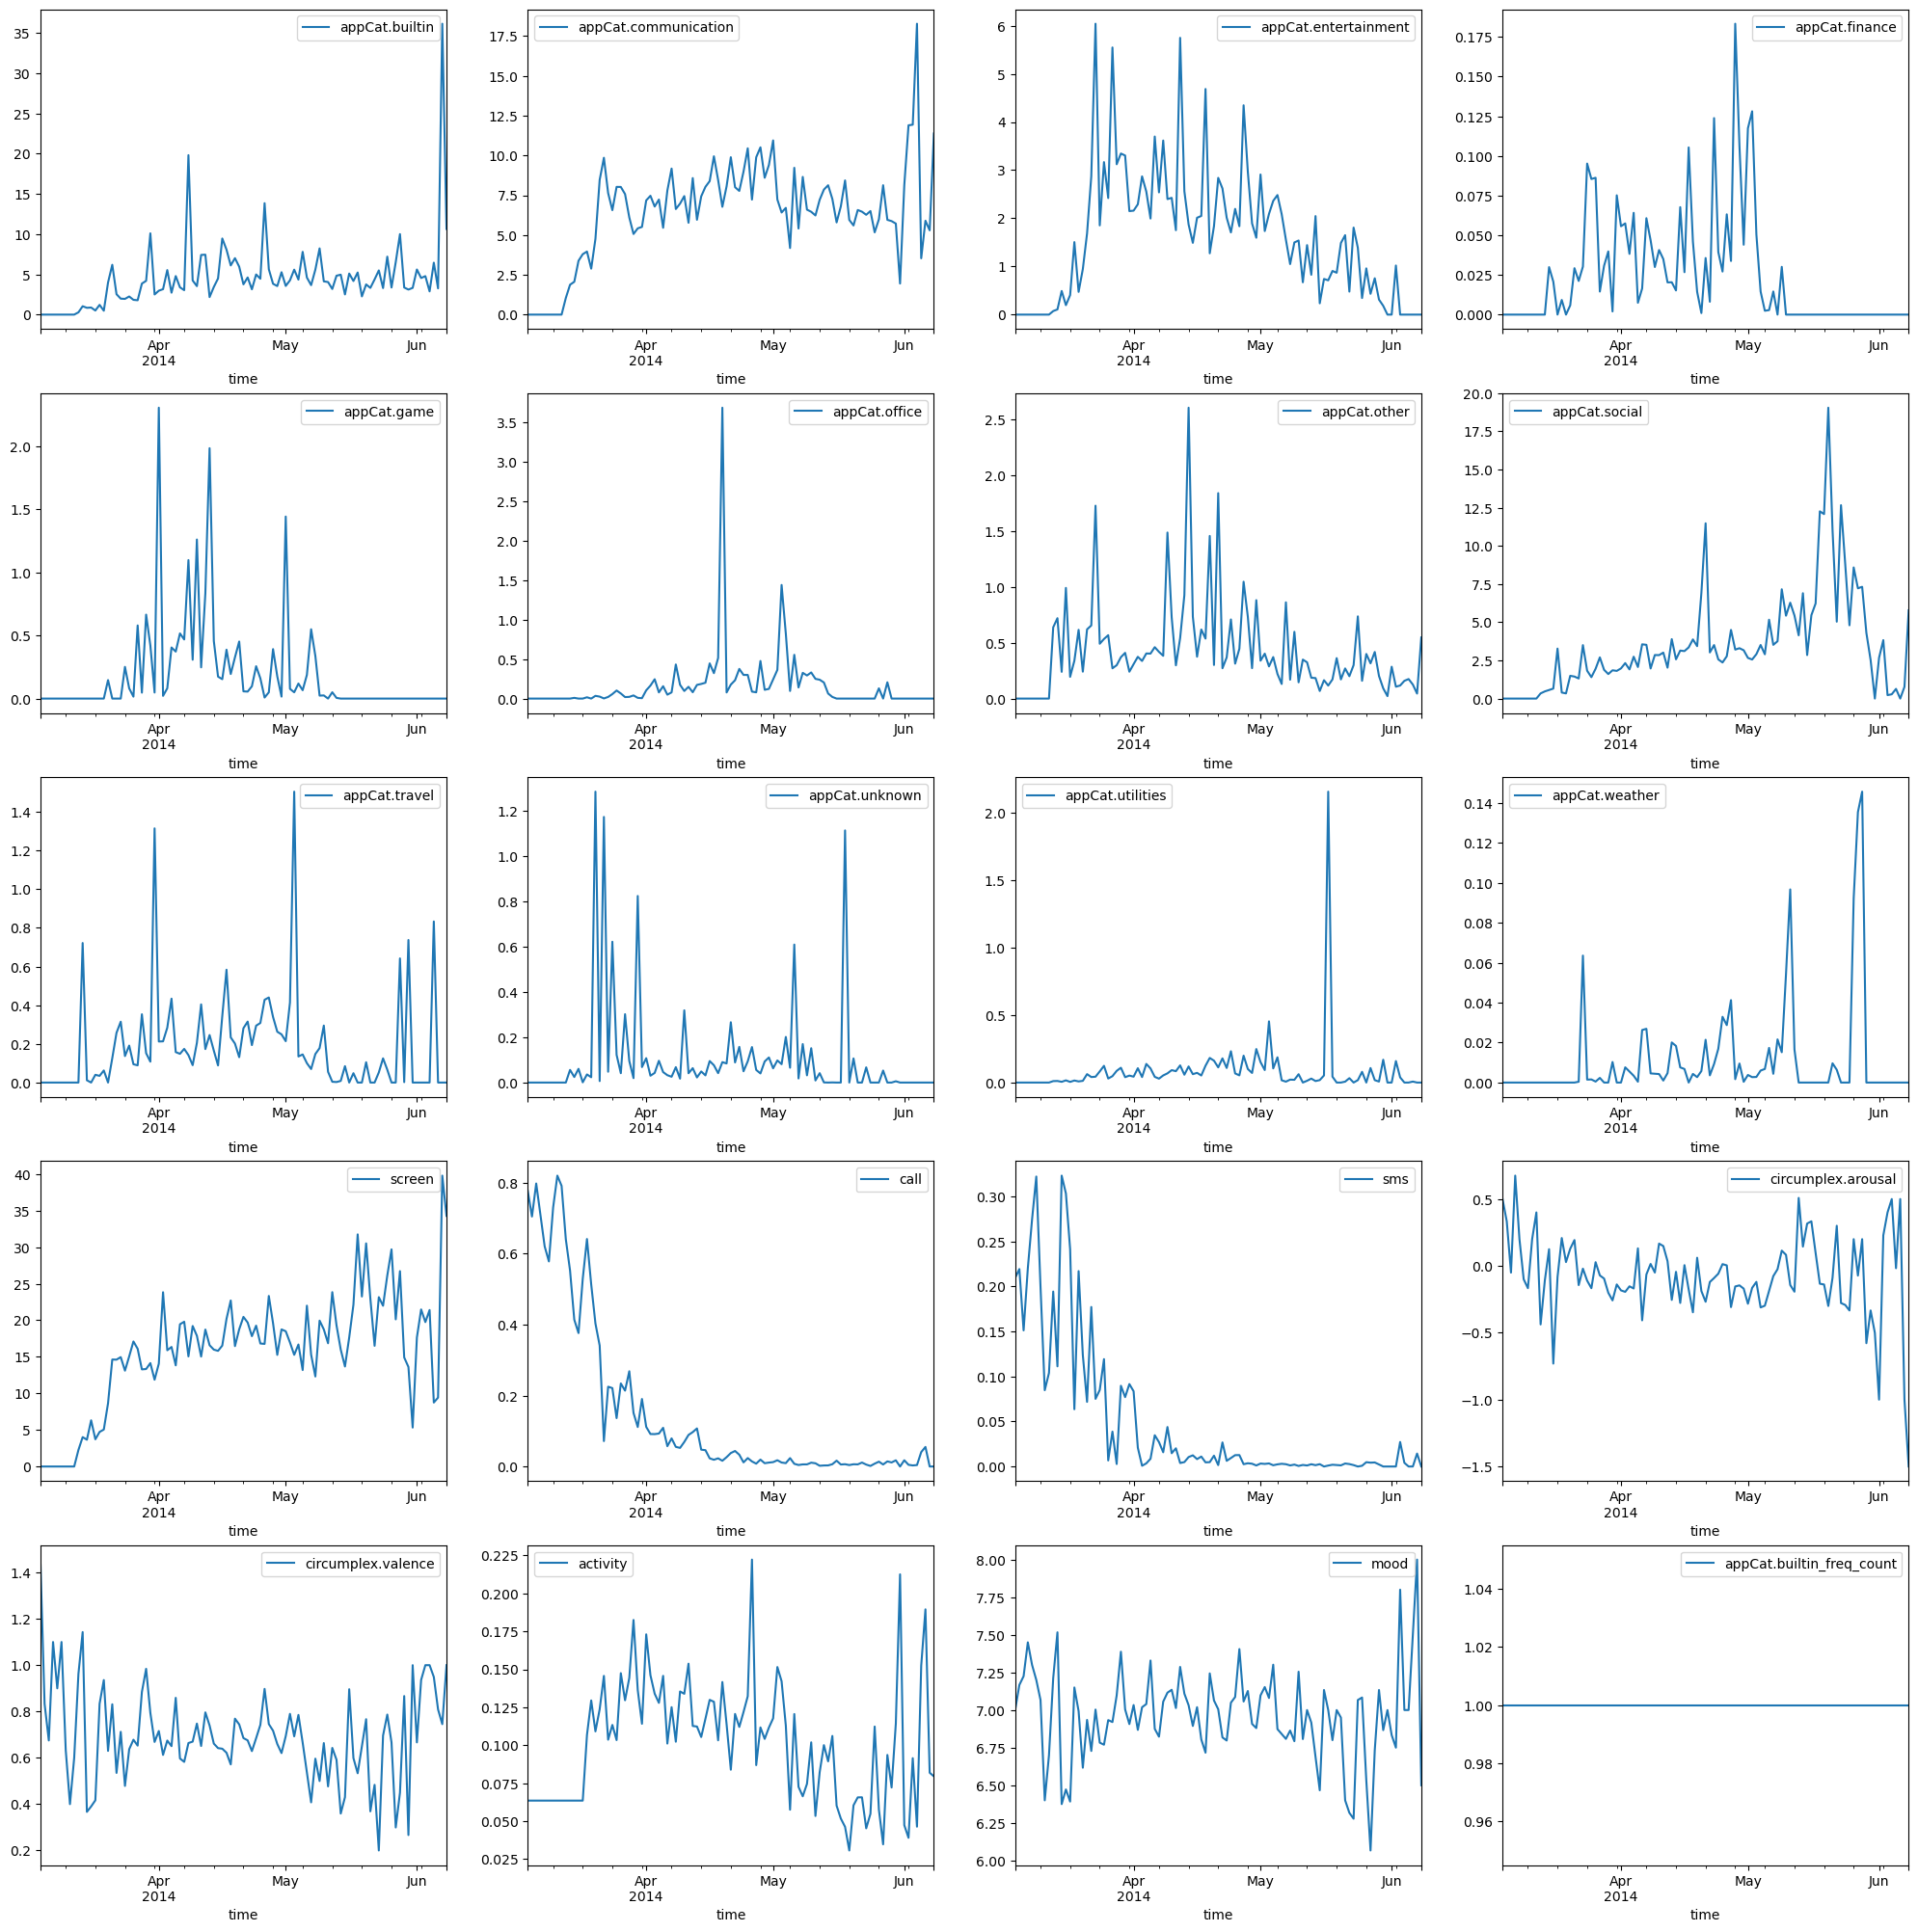

In [11]:
# plot of vars after all imputation steps - line plot 
p_id = list(itertools.product(list(range(0,5)), list(range(0,4))))
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(25,25))

for i, col in enumerate(grouped_wide.columns[1:]):
    grouped_wide.plot(x='time', y=col, kind='line', ax=axs[p_id[i][0],p_id[i][1]])
plt.show()

In [ ]:
# plot of vars after all imputation steps - histogram 
p_id = list(itertools.product(list(range(0,5)), list(range(0,4))))
fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(25,25))

for i, col in enumerate(grouped_wide.columns[1:]):
    grouped_wide.plot(x='time', y=col, kind='hist', ax=axs[p_id[i][0],p_id[i][1]])
plt.show()

In [ ]:
# show rows with missing values
grouped_wide[grouped_wide.isnull().any(axis=1)]

In [ ]:
# correlation matrix of the aggregated variables
corr = grouped_wide.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from itertools import cycle

palette = sns.color_palette("husl", n_colors=len(data.id.unique()))
color_cycle = cycle(palette)

for i in data.id.unique():
    current_color = next(color_cycle)
    plt.figure(figsize=(12, 6)) 
    sns.lineplot(
        data=data[data.id == i], 
        x='time', 
        y='mood', 
        color=current_color, 
        marker='o',  # Show data points as dots
        linestyle='--'  # Make the lines dashed
    )
    plt.title(i)
    plt.savefig('plots/timeseries/' + i + '.png')
    plt.clf()

In [ ]:
# for every variable, plot the distribution
vars = ['mood']
for var in vars:
    if var not in ['id', 'time']:
        sns.histplot(data, x=var, kde=True)
        plt.title(f'Distribution of {var}')
        plt.xlabel(var)
        plt.ylabel('Frequency')
        # save plot
        plt.savefig('plots/distribution/' + var + '.png')
        plt.clf()

## TASK 1C: FEATURE ENGINEERING

## Modelling